In [1]:
import pyscal.core as pc
import pyscal.crystal_structures as pcs
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
from pymolsim.sim import Sim
from pymolsim.potential import LJ
from pymolsim.thermostat import Andersen

In [3]:
#sys = pc.System()
#sys.read_inputfile("conf.dump", customkeys=["mass", "vx", "vy", "vz"])
#atoms = sys.atoms
#box = sys.box

In [4]:
atoms, box = pcs.make_crystal(structure="fcc", lattice_constant=1.585, repetitions=(5,5,5))


In [5]:
sim = Sim(atoms, box)

In [6]:
sim.beta = 0.8
sim.pressure = 0
sim.dt = 0.01
lj = LJ(1.0, 1.0)
sim.potential = lj
#sim.thermostat = Andersen(frequency=0.001)
sim.start()
sim.forces()

run md verelet


/home/sarath/miniconda3/envs/lammps/lib/python3.7/site-packages/pymolsim-0.0.1-py3.7.egg/pymolsim/potential.py:29: RuntimeWarning: divide by zero encountered in true_divide
/home/sarath/miniconda3/envs/lammps/lib/python3.7/site-packages/pymolsim-0.0.1-py3.7.egg/pymolsim/potential.py:33: RuntimeWarning: invalid value encountered in true_divide
/home/sarath/miniconda3/envs/lammps/lib/python3.7/site-packages/pymolsim-0.0.1-py3.7.egg/pymolsim/potential.py:39: RuntimeWarning: divide by zero encountered in true_divide


In [7]:
sim.dump(0)

In [8]:
temps = []
for i in tqdm(range(1, 1000)):
    sim.run()
    temps.append(sim.temperature)
    if i%100 ==0:
        sim.dump(i)

100%|██████████| 999/999 [00:35<00:00, 28.22it/s]


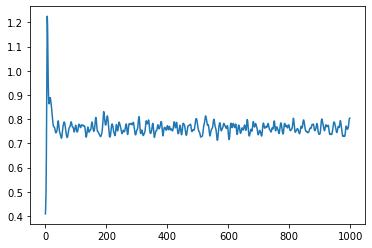

In [9]:
plt.plot(1/np.array(temps))